In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


These are the various libraries used in the program. After writing here, we do not write the libraries again and again.

In [3]:
df=pd.read_csv("assignment.csv")
np.shape(df)

(306, 4)

This defines the shape i.e the number of rows and columns occupied by the data.

In [4]:
print (df.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


This mentions all the columns of the data.

In [16]:
df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


As you can see this gives a brief description like the count, standard deviation, minimun, maximum and mean values about our data.

In [35]:
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


This shows first 5 entries.

In [36]:
df.tail()

,age,year,nodes,status
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


This shows last 5 entries.

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


This gives basic information about the data stored, like there is no null value in any column, all columns use same datatype (i.e int64), memory occupied, etc.

In [8]:
print(df.age)

0      30
1      30
2      30
3      31
4      31
       ..
301    75
302    76
303    77
304    78
305    83
Name: age, Length: 306, dtype: int64


This prints the column and provides details like length and datatype about the column mentioned.

In [48]:
df[df.duplicated()]

,age,year,nodes,status
23,37,63,0,1
27,38,60,0,1
52,41,65,0,1
65,43,64,0,2
78,44,61,0,1
108,48,58,11,2
132,50,61,0,1
179,54,62,0,1
184,55,58,1,1
196,56,60,0,1


This finds the copied or duplicated entries in the data.

In [9]:
print(df.age>50)

0      False
1      False
2      False
3      False
4      False
       ...  
301     True
302     True
303     True
304     True
305     True
Name: age, Length: 306, dtype: bool


This checks whether the age is more than 50 (or as mentioned in the query) or not and gives a boolean output.

In [10]:
df["age"].value_counts()

52    14
54    13
50    12
47    11
53    11
43    11
57    11
49    10
65    10
55    10
38    10
41    10
42     9
45     9
61     9
59     8
63     8
56     7
58     7
62     7
48     7
46     7
44     7
70     7
34     7
51     6
67     6
39     6
37     6
60     6
66     5
64     5
69     4
72     4
30     3
40     3
31     2
68     2
36     2
35     2
33     2
73     2
74     2
71     1
75     1
76     1
77     1
78     1
83     1
Name: age, dtype: int64

This counts the number of entries respective to the column specified.

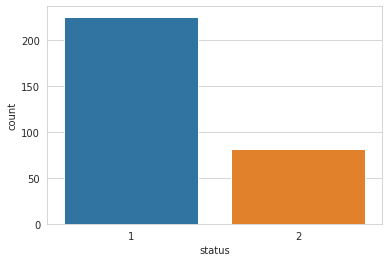

In [54]:
sns.countplot('status', data=df)

This gives the count of entries with respect to the status. Status 1 has around 220 and status 2 has around 80 entries.

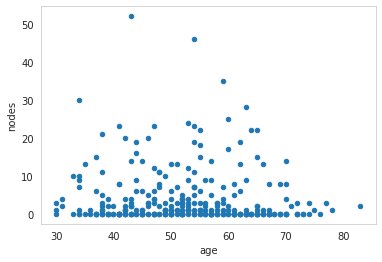

In [37]:
df.plot(kind="scatter",x="age",y="nodes");
plt.grid()
plt.show()

This gives a scatter plot of nodes with respect to the age. Most people have 0 nodes.

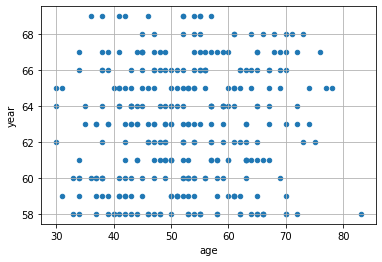

In [12]:
df.plot(kind="scatter",x="age",y="year");
plt.grid()
plt.show()

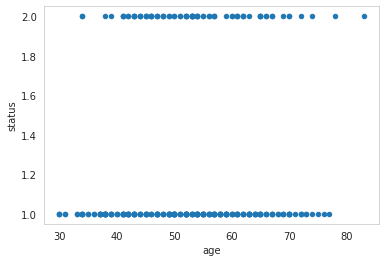

In [38]:
df.plot(kind="scatter",x="age",y="status");
plt.grid()
plt.show()

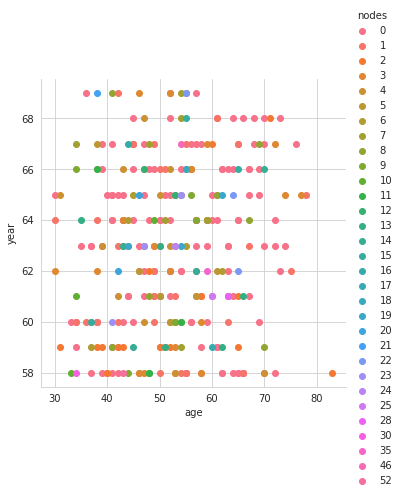

In [39]:
sns.set_style("whitegrid");

sns.FacetGrid(df, hue="nodes",size=5)\
.map(plt.scatter, "age","year")\
.add_legend();
plt.show();

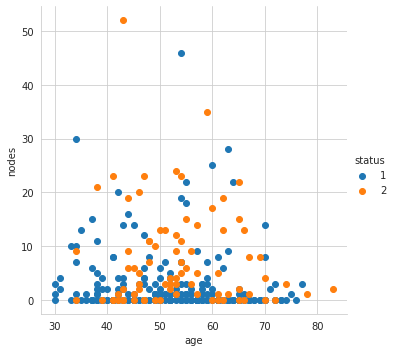

In [14]:
sns.set_style("whitegrid");

sns.FacetGrid(df, hue="status",size=5)\
.map(plt.scatter, "age","nodes")\
.add_legend();
plt.show();

More people of age more than 50 and have more than 10 nodes have status 2.

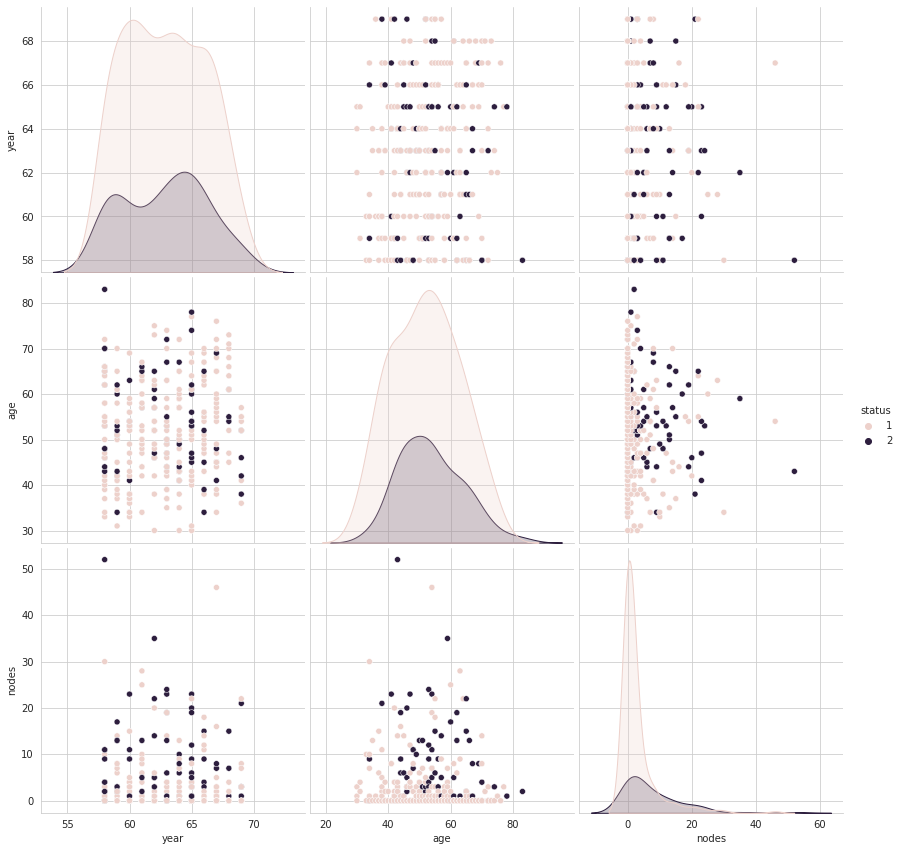

In [41]:
plt.close()
sns.pairplot(df,hue="status",vars=['year', 'age', 'nodes'],size=4)
plt.show()

It gives the distribution of status across various other variables.

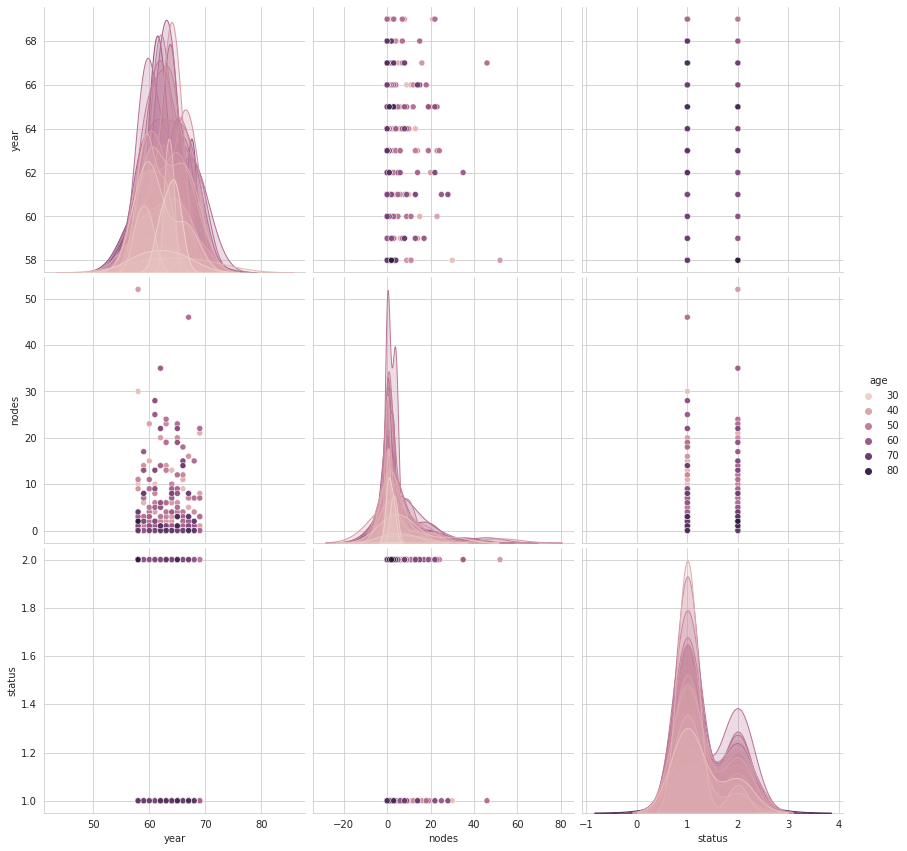

In [42]:
plt.close()
sns.pairplot(df,hue="age",vars=['year', 'nodes', 'status'],size=4)
plt.show()

Gives the distribution of age along various other variables.

In [25]:
def dens_plot(features,class_var):
    sns.set_style(style="whitegrid")    
    sns.FacetGrid(data=df, hue=class_var,size=5)\
        .map(sns.distplot,features)\
        .add_legend()

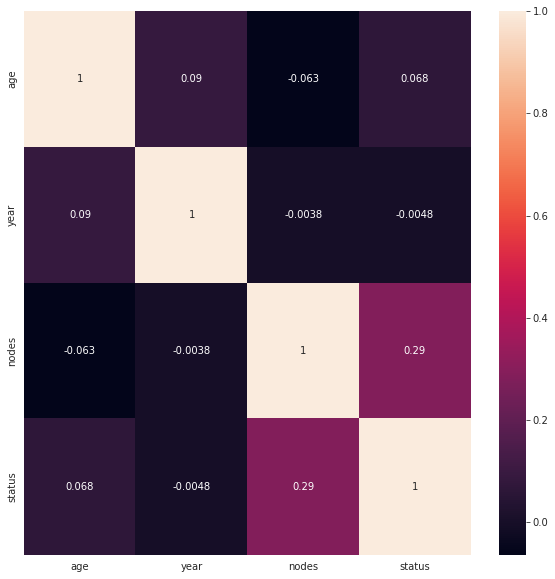

In [58]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

(Year and nodes) and (year and status) are slightly correlated to each other.

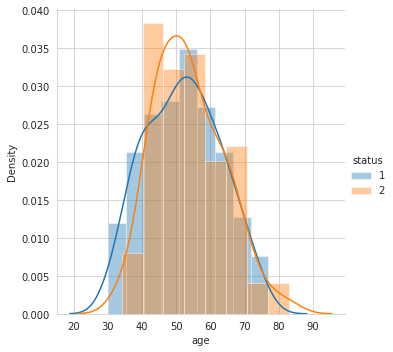

In [26]:
dens_plot("age","status")
plt.show()

Shows age vs status distribution and density.
Status 1 is max around age 50 and status 2 is max around age 52.

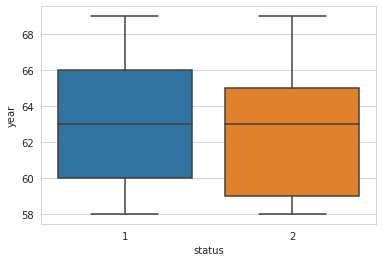

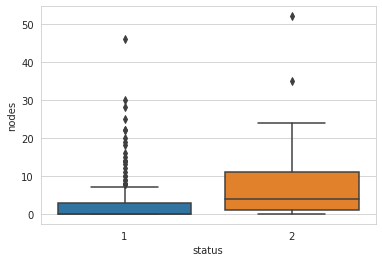

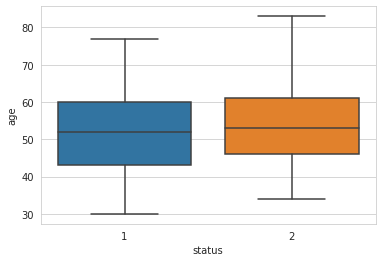

In [56]:
sns.boxplot(x = 'status', y ='year', data = df)
plt.show()

sns.boxplot(x = 'status',y = 'nodes', data = df)
plt.show()

sns.boxplot(x = 'status', y = 'age', data = df)
plt.show()

Status 1 is mostly occupied by people having 0 to 2 nodes and status 2 is mostly occupied by people having more than 1 node.

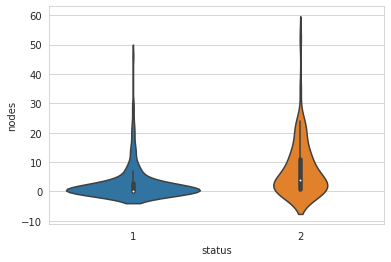

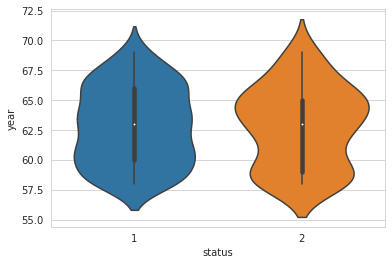

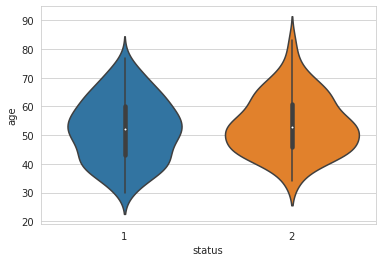

In [33]:
sns.violinplot(x = "status", y = "nodes", data = df, size = 8)
plt.show()

sns.violinplot(x = "status", y = "year", data = df, size = 8)
plt.show()

sns.violinplot(x = "status", y = "age", data = df, size = 8)
plt.show()

Status 1 is mostly occupied by the people with zero nodes.
Status 2 is mostly occupied by people of age 50 years.